In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras import datasets
import keras
from keras.models import Sequential, load_model
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization, ZeroPadding2D

In [ ]:
(samples, labels), (samples_test, labels_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
samples, samples_test, labels, labels_test = train_test_split(samples, labels, test_size=0.3, random_state=0)

In [ ]:
samples.shape

(35000, 32, 32, 3)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
samples = samples.astype('float32')
samples_test = samples_test.astype('float32')

samples = samples / 255
samples_test = samples_test / 255 

num_classes = 10
labels = np_utils.to_categorical(labels, num_classes)
labels_test = np_utils.to_categorical(labels_test, num_classes)

In [ ]:
from keras.optimizers import SGD
opt = SGD(learning_rate=0.01)

# 3rd (a)

In [ ]:
model_a = Sequential()

model_a.add(layers.ZeroPadding2D(padding=1))
model_a.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_a.add(layers.MaxPooling2D(pool_size=(2,2)))
model_a.add(layers.Dropout(0.5))

model_a.add(layers.Flatten())
model_a.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_a.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history_a = model_a.fit(samples, labels, batch_size=64, epochs=100,
                    validation_data=(samples_test, labels_test))

Epoch 1/100
547/547 [==============================] - 2s 4ms/step - loss: 2.0809 - accuracy: 0.2520 - val_loss: 1.9067 - val_accuracy: 0.3384
Epoch 2/100
547/547 [==============================] - 2s 4ms/step - loss: 1.8662 - accuracy: 0.3482 - val_loss: 1.7800 - val_accuracy: 0.3796
Epoch 3/100
547/547 [==============================] - 2s 4ms/step - loss: 1.7441 - accuracy: 0.3915 - val_loss: 1.6635 - val_accuracy: 0.4349
Epoch 4/100
547/547 [==============================] - 2s 4ms/step - loss: 1.6472 - accuracy: 0.4243 - val_loss: 1.5755 - val_accuracy: 0.4585
Epoch 5/100
547/547 [==============================] - 2s 4ms/step - loss: 1.5721 - accuracy: 0.4500 - val_loss: 1.5099 - val_accuracy: 0.4807
Epoch 6/100
547/547 [==============================] - 2s 4ms/step - loss: 1.5091 - accuracy: 0.4714 - val_loss: 1.4579 - val_accuracy: 0.4993
Epoch 7/100
547/547 [==============================] - 2s 4ms/step - loss: 1.4628 - accuracy: 0.4889 - val_loss: 1.4187 - val_accuracy: 0.5142

In [ ]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 34, 34, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                92490     
Total params: 93,386
Trainable params: 93,386
Non-trainable params: 0
____________________________________________________

Text(0.5, 1.0, 'Accuracy Curves')

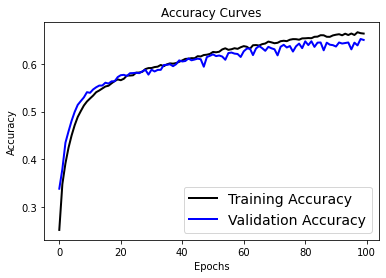

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history_a.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_a.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# 3rd (b)

In [ ]:
model_b = Sequential()

model_b.add(layers.ZeroPadding2D(padding=1))
model_b.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_b.add(layers.BatchNormalization())
model_b.add(layers.MaxPooling2D(pool_size=(2,2)))
model_b.add(layers.Dropout(0.5))

model_b.add(layers.Flatten())

model_b.add(layers.Dense(64, activation='relu'))
model_b.add(layers.BatchNormalization())
model_b.add(layers.Dropout(0.5))
model_b.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_b.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history_b = model_b.fit(samples, labels, batch_size=64, epochs=100,
                    validation_data=(samples_test, labels_test))

Epoch 1/100
547/547 [==============================] - 3s 5ms/step - loss: 2.0964 - accuracy: 0.3027 - val_loss: 1.6698 - val_accuracy: 0.4224
Epoch 2/100
547/547 [==============================] - 2s 4ms/step - loss: 1.6854 - accuracy: 0.3993 - val_loss: 1.4421 - val_accuracy: 0.4836
Epoch 3/100
547/547 [==============================] - 2s 4ms/step - loss: 1.5594 - accuracy: 0.4408 - val_loss: 1.3885 - val_accuracy: 0.5059
Epoch 4/100
547/547 [==============================] - 2s 4ms/step - loss: 1.4937 - accuracy: 0.4631 - val_loss: 1.3689 - val_accuracy: 0.5131
Epoch 5/100
547/547 [==============================] - 2s 4ms/step - loss: 1.4463 - accuracy: 0.4799 - val_loss: 1.3548 - val_accuracy: 0.5134
Epoch 6/100
547/547 [==============================] - 2s 4ms/step - loss: 1.4108 - accuracy: 0.4933 - val_loss: 1.3349 - val_accuracy: 0.5241
Epoch 7/100
547/547 [==============================] - 2s 4ms/step - loss: 1.3753 - accuracy: 0.5088 - val_loss: 1.3469 - val_accuracy: 0.5137

In [ ]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 34, 34, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

Text(0.5, 1.0, 'Accuracy Curves')

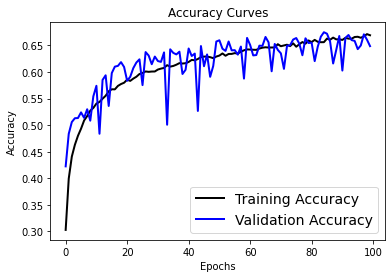

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history_b.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_b.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# 3rd (c)

In [ ]:
model_c = Sequential()

model_c.add(layers.ZeroPadding2D(1))
model_c.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_c.add(layers.BatchNormalization())
model_c.add(layers.MaxPooling2D(pool_size=(2,2)))
model_c.add(layers.Dropout(0.5))

model_c.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model_c.add(layers.BatchNormalization())
model_c.add(layers.MaxPooling2D(pool_size=(2,2)))
model_c.add(layers.Dropout(0.5))

model_c.add(layers.Flatten())

model_c.add(layers.Dense(64, activation='relu'))
model_c.add(layers.BatchNormalization())
model_c.add(layers.Dropout(0.5))
model_c.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_c.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history_c = model_c.fit(samples, labels, batch_size=64, epochs=100,
                    validation_data=(samples_test, labels_test))

Epoch 1/100
547/547 [==============================] - 3s 6ms/step - loss: 2.1954 - accuracy: 0.2770 - val_loss: 2.7308 - val_accuracy: 0.2306
Epoch 2/100
547/547 [==============================] - 3s 5ms/step - loss: 1.7415 - accuracy: 0.3715 - val_loss: 1.6679 - val_accuracy: 0.4011
Epoch 3/100
547/547 [==============================] - 3s 5ms/step - loss: 1.6294 - accuracy: 0.4099 - val_loss: 1.5608 - val_accuracy: 0.4485
Epoch 4/100
547/547 [==============================] - 3s 5ms/step - loss: 1.5636 - accuracy: 0.4357 - val_loss: 1.4464 - val_accuracy: 0.4785
Epoch 5/100
547/547 [==============================] - 3s 5ms/step - loss: 1.5171 - accuracy: 0.4510 - val_loss: 1.4318 - val_accuracy: 0.4830
Epoch 6/100
547/547 [==============================] - 3s 5ms/step - loss: 1.4795 - accuracy: 0.4626 - val_loss: 1.5607 - val_accuracy: 0.4569
Epoch 7/100
547/547 [==============================] - 3s 5ms/step - loss: 1.4535 - accuracy: 0.4754 - val_loss: 1.5652 - val_accuracy: 0.4441

In [ ]:
model_c.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 34, 34, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 17, 17, 64)       

Text(0.5, 1.0, 'Accuracy Curves')

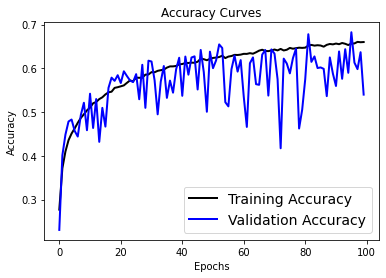

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history_c.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_c.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# 3rd (d)

In [ ]:
model_d = Sequential()

model_d.add(layers.ZeroPadding2D(padding=1))
model_d.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_d.add(layers.BatchNormalization())
model_d.add(layers.MaxPooling2D(pool_size=(2,2)))
model_d.add(layers.Dropout(0.5))

model_d.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model_d.add(layers.BatchNormalization())
model_d.add(layers.MaxPooling2D(pool_size=(2,2)))
model_d.add(layers.Dropout(0.5))

model_d.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model_d.add(layers.BatchNormalization())
model_d.add(layers.MaxPooling2D(pool_size=(2,2)))
model_d.add(layers.Dropout(0.5))

model_d.add(layers.Flatten())

model_d.add(layers.Dense(64, activation='relu'))
model_d.add(layers.BatchNormalization())
model_d.add(layers.Dropout(0.5))
model_d.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_d.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history_d = model_d.fit(samples, labels, batch_size=64, epochs=100,
                    validation_data=(samples_test, labels_test))

Epoch 1/100
547/547 [==============================] - 3s 6ms/step - loss: 2.3295 - accuracy: 0.2319 - val_loss: 6.5052 - val_accuracy: 0.1427
Epoch 2/100
547/547 [==============================] - 3s 6ms/step - loss: 1.8487 - accuracy: 0.3254 - val_loss: 3.0985 - val_accuracy: 0.2536
Epoch 3/100
547/547 [==============================] - 3s 6ms/step - loss: 1.7096 - accuracy: 0.3699 - val_loss: 2.2927 - val_accuracy: 0.3395
Epoch 4/100
547/547 [==============================] - 3s 6ms/step - loss: 1.6462 - accuracy: 0.3938 - val_loss: 2.8619 - val_accuracy: 0.3249
Epoch 5/100
547/547 [==============================] - 3s 6ms/step - loss: 1.6062 - accuracy: 0.4107 - val_loss: 1.7713 - val_accuracy: 0.3810
Epoch 6/100
547/547 [==============================] - 3s 6ms/step - loss: 1.5713 - accuracy: 0.4265 - val_loss: 2.1469 - val_accuracy: 0.2865
Epoch 7/100
547/547 [==============================] - 3s 6ms/step - loss: 1.5408 - accuracy: 0.4369 - val_loss: 1.8143 - val_accuracy: 0.3779

In [ ]:
model_d.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 34, 34, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 17, 17, 64)       

Text(0.5, 1.0, 'Accuracy Curves')

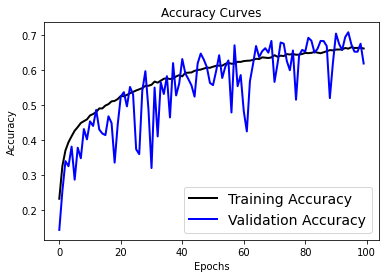

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history_d.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history_d.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
joblib.dump(history_d.history,'/content/drive/MyDrive/ML_Assignment6/BestModel_SGD_ACCLOSS')

['/content/drive/MyDrive/ML_Assignment6/BestModel_SGD_ACCLOSS']

In [ ]:
# history_d.model.save('/content/drive/MyDrive/ML_Assignment6/BestModel_SGD.h5')
# model_d_ = load_model('/content/drive/MyDrive/ML_Assignment6/BestModel_SGD.h5')

In [ ]:
# history_a.model.save('/content/drive/MyDrive/ML_Assignment6/BestModel_a_SGD.h5')

In [ ]:
loss,acc = model_a.evaluate(samples_test,labels_test)
print(acc*100)

469/469 [==============================] - 1s 2ms/step - loss: 1.0179 - accuracy: 0.6503
65.02666473388672


# Best among a,b,c,d

In [ ]:
def max_accuracy(acc):
  max = 0
  for i in acc:
    if (max<i):
      max = i
  return max

In [ ]:
acc_a = max_accuracy(history_a.history['val_accuracy'])
acc_b = max_accuracy(history_b.history['val_accuracy'])
acc_c = max_accuracy(history_c.history['val_accuracy'])
acc_d = max_accuracy(history_d.history['val_accuracy'])
print("Model a = {0:.3f}%".format(acc_a*100))
print("Model b = {0:.3f}%".format(acc_b*100))
print("Model c = {0:.3f}%".format(acc_c*100))
print("Model d = {0:.3f}%".format(acc_d*100))

Model a = 65.220%
Model b = 67.493%
Model c = 68.253%
Model d = 70.820%


# Analysis Table

In [ ]:
# joblib.dump(df,'/content/drive/MyDrive/ML_Assignment6/Accuracies')
df = joblib.load('/content/drive/MyDrive/ML_Assignment6/Accuracies')
print('\033[1m'+'\t\t\t\t\t\t\t\tAccuracies Before Dropout')
df

								Accuracies Before Dropout


(a)Training Accuracy  ...  (d)Testing Accuracy
0               0.46894  ...               0.6078
1               0.71254  ...               0.7319
2               0.76746  ...               0.7472
3               0.80302  ...               0.7573
4               0.83266  ...               0.7498
5               0.85304  ...               0.7562
6               0.87326  ...               0.7530
7               0.88980  ...               0.7531
8               0.90352  ...               0.7480
9               0.91258  ...               0.7522

[10 rows x 8 columns]

In [ ]:
df = pd.DataFrame()
df['(a)Training Accuracy'] = [history_a.history['accuracy'][i] for i in range(len(history_a.history['accuracy'])) if i%10 == 0]
df['(a)Testing Accuracy'] = [history_a.history['val_accuracy'][i] for i in range(len(history_a.history['val_accuracy'])) if i%10 == 0]
df['(b)Training Accuracy'] = [history_b.history['accuracy'][i] for i in range(len(history_b.history['accuracy'])) if i%10 == 0]
df['(b)Testing Accuracy'] = [history_b.history['val_accuracy'][i] for i in range(len(history_b.history['accuracy'])) if i%10 == 0]
df['(c)Training Accuracy'] = [history_c.history['accuracy'][i] for i in range(len(history_c.history['accuracy'])) if i%10 == 0]
df['(c)Testing Accuracy'] = [history_c.history['val_accuracy'][i] for i in range(len(history_c.history['accuracy'])) if i%10 == 0]
df['(d)Training Accuracy'] = [history_d.history['accuracy'][i] for i in range(len(history_d.history['accuracy'])) if i%10 == 0]
df['(d)Testing Accuracy'] = [history_d.history['val_accuracy'][i] for i in range(len(history_d.history['accuracy'])) if i%10 == 0]

In [ ]:
# joblib.dump(df,'/content/drive/MyDrive/ML_Assignment6/Accuracies_After_DropOut')
df = joblib.load('/content/drive/MyDrive/ML_Assignment6/Accuracies_After_DropOut')
print('\033[1m'+'\t\t\t\t\t\t\t\tAccuracies After Dropout')
df

								Accuracies After Dropout


(a)Training Accuracy  ...  (d)Testing Accuracy
0              0.252029  ...             0.142733
1              0.527543  ...             0.453267
2              0.565857  ...             0.524467
3              0.591371  ...             0.319733
4              0.607371  ...             0.631533
5              0.625114  ...             0.556933
6              0.637286  ...             0.482800
7              0.643343  ...             0.566200
8              0.653714  ...             0.652800
9              0.661229  ...             0.704467

[10 rows x 8 columns]

# Best Overall

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
782/782 [==============================] - 8s 10ms/step - loss: 1.6978 - accuracy: 0.4166 - val_loss: 1.2633 - val_accuracy: 0.5455
Epoch 2/100
782/782 [==============================] - 7s 9ms/step - loss: 1.1726 - accuracy: 0.5824 - val_loss: 1.0661 - val_accuracy: 0.6199
Epoch 3/100
782/782 [==============================] - 7s 9ms/step - loss: 1.0012 - accuracy: 0.6453 - val_loss: 0.8187 - val_accuracy: 0.7056
Epoch 4/100
782/782 [==============================] - 7s 9ms/step - loss: 0.8868 - accuracy: 0.6859 - val_loss: 0.7952 - val_accuracy: 0.7229
Epoch 5/100
782/782 [==============================] - 7s 9ms/step - loss: 0.8215 - accuracy: 0.7154 - val_loss: 0.8623 - val_accuracy: 0.6888
Epoch 6/100
782/782 [==============================] - 7s 9ms/step - loss: 0.7630 - accuracy: 0.7367 - val_loss: 0.8148 - val_accuracy: 0.7119
Epoch 7/100
782/782 [==============================] - 7s 9ms/step - loss: 0.7129 - accuracy: 0.7541 - val_loss: 0.7153 - val_accuracy: 0.753

Text(0.5, 1.0, 'Loss Curves')

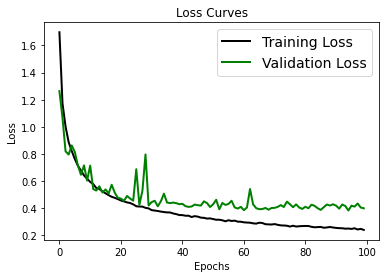

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

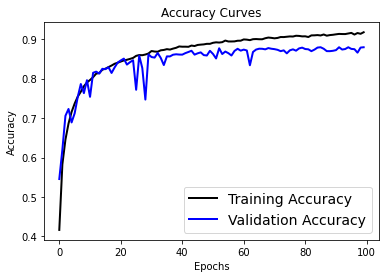

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
accuracy_score(labels_test, y_pred)

0.8792

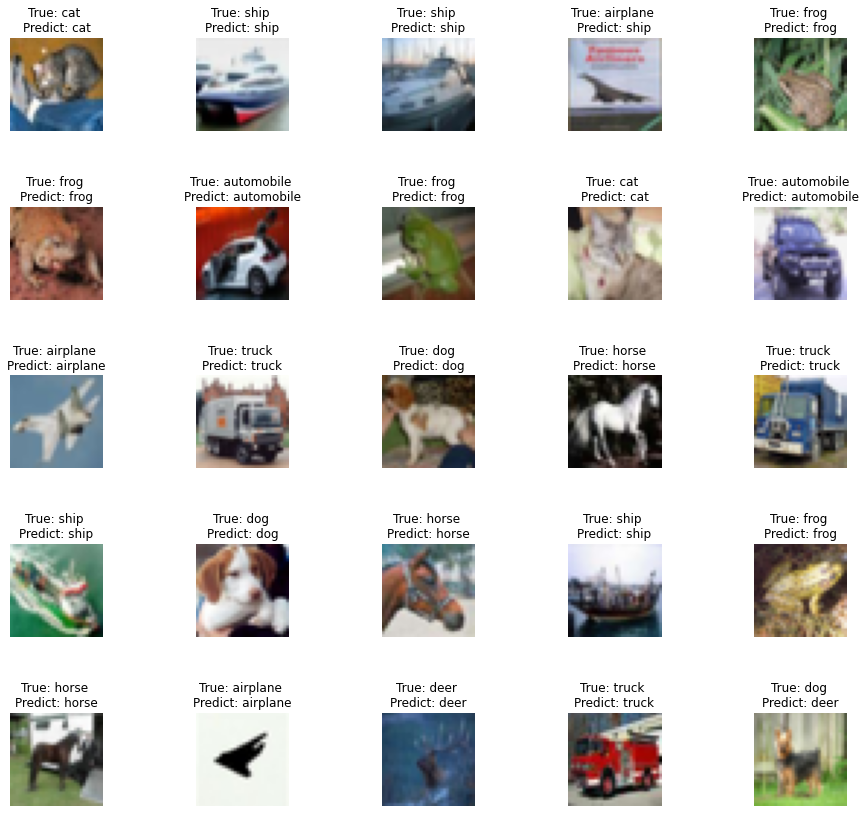

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)